<h1> Volume 02 Computer Vision Basics </h1>

Sequel of the first notebook about computer vision.

These projects aren't as beginner's as the ones in first notebook so I decided split them into another notebook.


Projects on this notebook:
- K-means Clustering for Segmentation
- Skew Correction [IN PROGRESS]
- Detect Templates in Images
- Watermarking [IN PROGRESS]
- Color Balancing [IN PROGRESS]
- Blur the Face 
- Cartoonize an Image [IN PROGRESS]
- Photo Sketching
- Generate, Detect and Read QR Code [IN PROGRESS]
- Bar-Code Detection [IN PROGRESS]
- Background Estimation [IN PROGRESS]




<h1>Classic Image Processing Algorithms</h1>


<h3> K-means Clustering for Segmentation

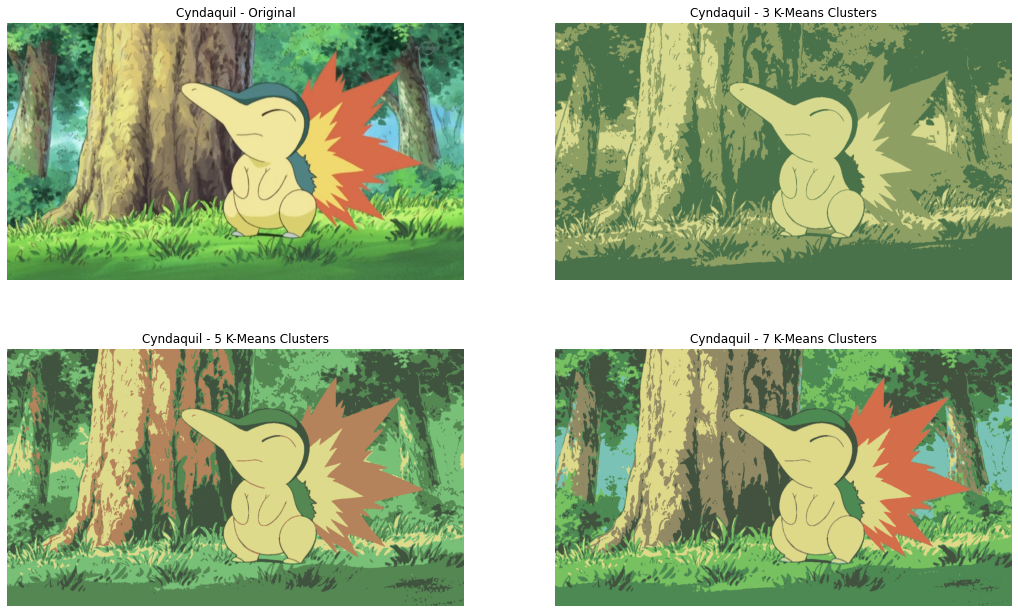

In [29]:
#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Read Image
img = cv.imread('images/cyndaquil.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')

# Convert data into float and array
imgFlatten = img.reshape((-1, 3))
imgFlatten = np.float32(imgFlatten)

nClusters = 3
attempts = 10

for i in range(3):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2) # criteria is: max iterations = 100 or min accuracy = 90%
    
    ret, labels, centers = cv.kmeans(imgFlatten, nClusters, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

    # Converting back data Adquired
    centers = np.uint8(centers)
    result = centers[labels.flatten()]
    clusteredImg = result.reshape((img.shape))
    variables.append(clusteredImg)
    titles.append(str(nClusters) + ' K-Means Clusters')
    nClusters += 2

# Plot Results
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Cyndaquil - ' + titles[i])
plt.rcParams["figure.figsize"] = (18, 11)
plt.show()

<h3> Skew Correction

<h3> Detect Templates in Images

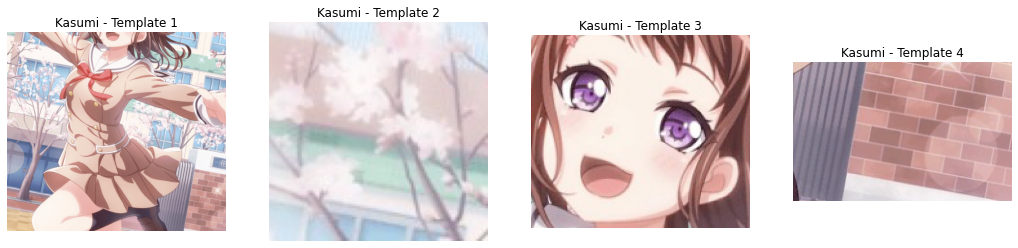

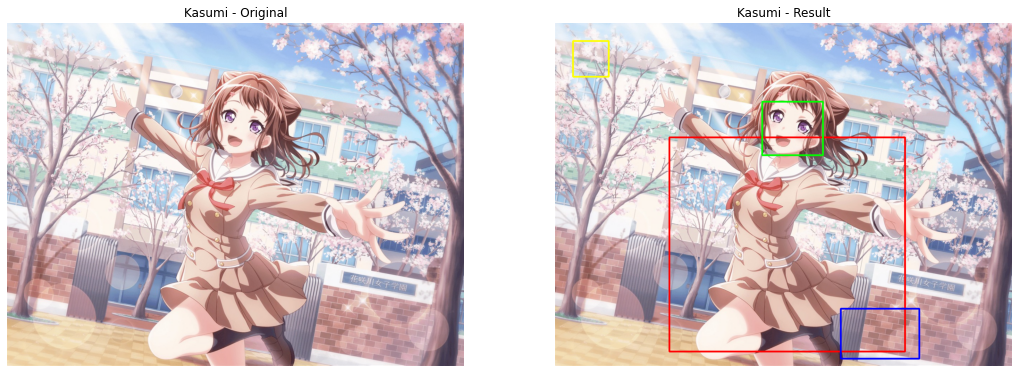

In [48]:
#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Read Image
img = cv.imread('images/kasumi.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gimg = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
cimg = img.copy()
### CROP SECTION TO CREATE TEMPLATES ###
templates = []

cropImg1 = img[320:920, 320:980]
gcropImg1 = cv.cvtColor(cropImg1, cv.COLOR_RGB2GRAY)
templates.append(gcropImg1)
variables.append(cropImg1)
titles.append('Template 1')

cropImg2 = img[50:150, 50:150]
gcropImg2 = cv.cvtColor(cropImg2, cv.COLOR_RGB2GRAY)
templates.append(gcropImg2)
variables.append(cropImg2)
titles.append('Template 2')

cropImg3 = img[220:370, 580:750]
gcropImg3 = cv.cvtColor(cropImg3, cv.COLOR_RGB2GRAY)
templates.append(gcropImg3)
variables.append(cropImg3)
titles.append('Template 3')

cropImg4 = img[800:940, 800:1020]
gcropImg4 = cv.cvtColor(cropImg4, cv.COLOR_RGB2GRAY)
templates.append(gcropImg4)
variables.append(cropImg4)
titles.append('Template 4')

variables.append(img)
titles.append('Original')

### TEMPLATE MATCHING SECTION ###
color = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255)]
for i in range(len(templates)):
    w, h = templates[i].shape[::-1]

    result = cv.matchTemplate(gimg, templates[i], cv.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(result)

    # determine the starting and ending (x, y)-coordinates of th
    (startX, startY) = maxLoc
    endX = startX + templates[i].shape[1]
    endY = startY + templates[i].shape[0]
    # draw the bounding box on the image
    cv.rectangle(cimg, (startX, startY), (endX, endY), color[i], 3)

variables.append(cimg)
titles.append('Result')

# Plot Results
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Kasumi - ' + titles[i])

plt.rcParams["figure.figsize"] = (18, 11)
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(variables[4])
plt.axis('off')
plt.title('Kasumi - ' + titles[4])
plt.subplot(1, 2, 2)
plt.imshow(variables[5])
plt.axis('off')
plt.title('Kasumi - ' + titles[5])
plt.rcParams["figure.figsize"] = (18, 11)
plt.show()

<h3> WaterMarking

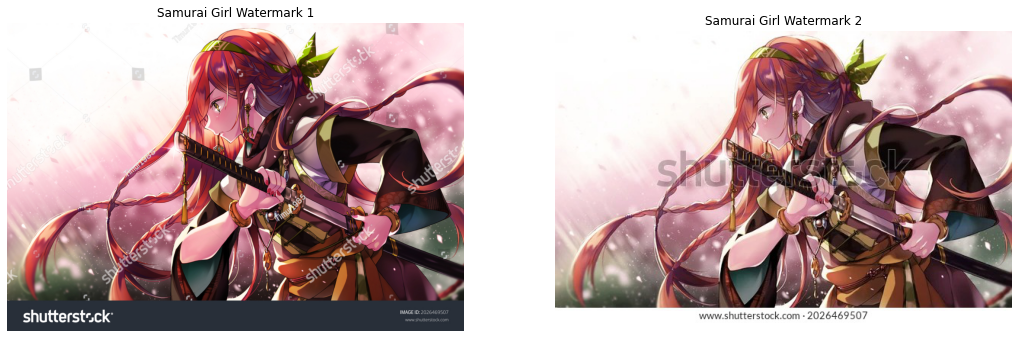

In [10]:
# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read Image
img1 = cv.imread('images/samurai-girl.jpg', cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('images/samurai-girl-2.jpeg', cv.IMREAD_COLOR)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)


# Result Plots
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Samurai Girl Watermark 1')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Samurai Girl Watermark 2')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3> Color Balancing

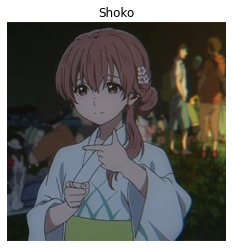

In [9]:

### COLOR BALANCING ###
#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read Image
img = cv.imread('images/shoko.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Result Plots
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Shoko')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()

<h3> Blur the Face

Text(0.5, 1.0, 'Tokyo Revengers')

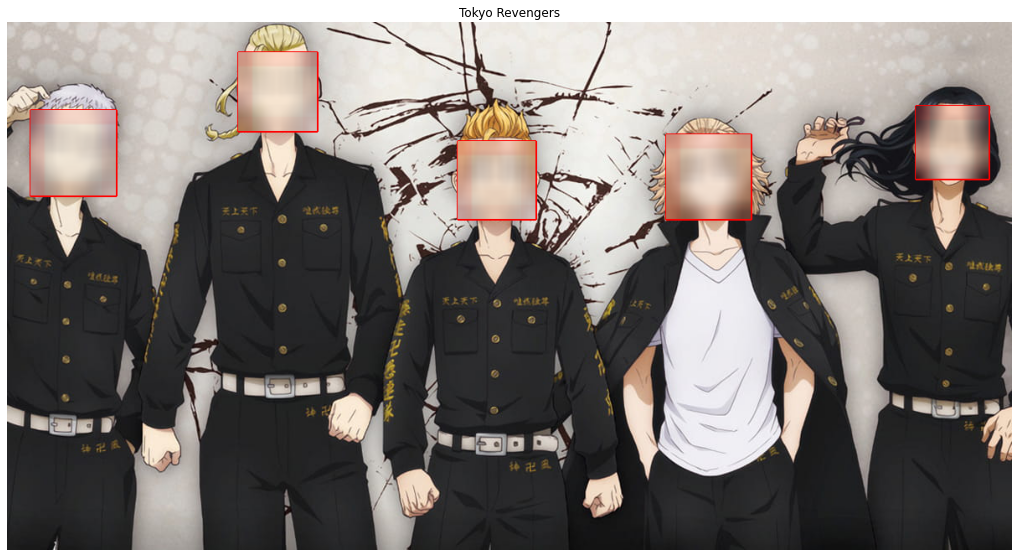

In [41]:
# Import Modules
import cv2 as cv
from matplotlib import pyplot as plt

# Haar Classifiers
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# Import Image
img = cv.imread('images/tokyo-revengers.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(gimg, 1.1, 7)

# Draw Rectangles on Faces
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_color = img[y:y+h, x:x+w]
    roi_color = cv.GaussianBlur(roi_color,(33, 33), 30)
    img[y:y+roi_color.shape[0], x:x+roi_color.shape[1]] = roi_color
    
# Plot Image
plt.imshow(img)
plt.axis('off')
plt.title('Tokyo Revengers')

<h3> Cartoonize an Image

<h3> Photo Sketching

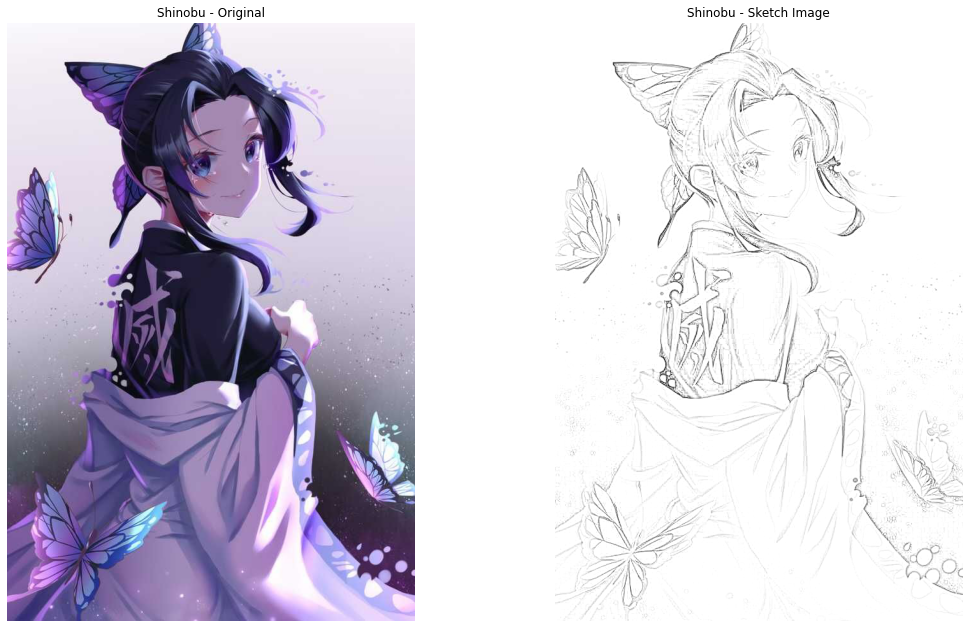

In [54]:
# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Create auxiliar variables to print
variables = [] 
titles = []

# Read Image and get gray scale
img = cv.imread('images/shinobu.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
variables.append(img)
titles.append('Original')

# Invert grey Scale
gimg_inv = cv.bitwise_not(gimg)

# Blur Image
gimg_blur = cv.GaussianBlur(gimg_inv, (9, 9), 0)

# Invert Blurred Image
gimg_blurInv=cv.bitwise_not(gimg_blur)

# Sketch Image
sketch_img=cv.divide(gimg, gimg_blurInv, scale=256.0)
variables.append(sketch_img)
titles.append('Sketch Image')


# Plot Results
for i in range(len(variables)):
    plt.subplot(1, 2, i+1)
    plt.imshow(variables[i])
    plt.axis('off')
    plt.title('Shinobu - ' + titles[i])
    if i == 1:
        plt.imshow(variables[i], cmap="gray")
plt.rcParams["figure.figsize"] = (18, 11)
plt.show()

<h3> Generate, Detect and Read QR Code

<h3> Bar-Code Detection

<h3> Background Estimation

In [ ]:
# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Read Capture
cap = cv.VideoCapture('LizWalk.mov')

#Get Random Frames from Video in order to create Background Image
randFrames = cap.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=12)

# Create Array with these random images picked out from Video
frames = []
for i in randFrames:
    cap.set(cv.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    frames.append(frame)

# Median Frame from random pictures
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    
#Convert to Gray Scale
gMedianFrame = cv.cvtColor(medianFrame, cv.COLOR_BGR2GRAY)

# Read Video Again
cap.set(cv.CAP_PROP_POS_FRAMES, 1)

# Save it into another video
h , w , l = frame.shape
vid = cv.VideoWriter('LizWalk.avi' , 0 ,30 ,(w,h))

ret = True
while(ret):

    #Read Frame
    ret, framez = cap.read()

    # Get Video Frames to compare with background image and convert to gray Scale
    framezz = cv.cvtColor(framez, cv.COLOR_BGR2GRAY)

    # Calculate difference between Image frame and Median Frame
    dframe = cv.absdiff(framezz, gMedianFrame)

    # Threshold to binarize difference
    th, dframe = cv.threshold(dframe, 30, 255, cv.THRESH_BINARY)
    vid.write(dframe)

    
    


plt.imshow(gMedianFrame, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Liz Walk')


<video controls src="LizWalk.mov" />